1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.092130329
1.333568505
1.088160127
1.130401526
1.09108663
1.34762654
1.345788055
1.371738932
1.306774944
1.355009321
1.168893763
1.005298063
1.235979767
1.097840269
1.212164055
1.028489199
1.13767486
1.03551061
1.043732136
1.041428053
1.133774339
1.142010465
1.152388511
1.124949033
1.152369746
1.062294492
1.002408025
1.097996277
1.040300414
1.08538044
1.26826344
1.745622601
1.196556465
1.290390962
1.191139377
1.765577172
1.769814791
1.823259286
1.692032684
1.782722372
1.385978194
1.012571855
1.54612362
1.217850187
1.477707358
1.206510749
1.993108526
1.16726237
1.365156471
1.24668566
1.976656053
1.935175502
2.077336948
1.677497054
2.045516178
1.438572547
1.013707792
1.485669581
1.255645937
1.563178669
1.105458599
1.453904964
1.124948148
1.192757356
1.138915041
1.384128258
1.4013079
1.507035262
1.436845192
1.416436718
1.178410228
1.009263867
1.306152175
1.156801441
1.272311796
[[1.         1.         1.         1.         1.         1.
  1.         1.      

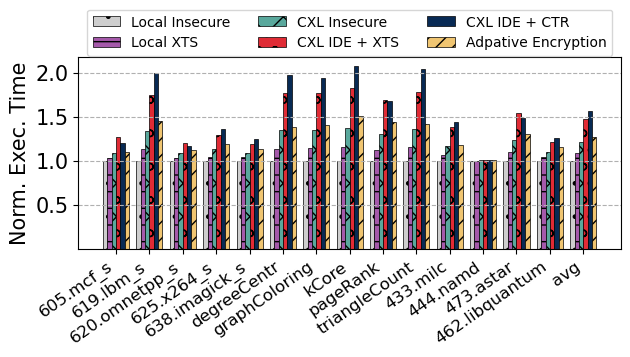

In [28]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl

#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=15
x=np.arange(N) 
xclicks=[
    '605.mcf_s','619.lbm_s','620.omnetpp_s','625.x264_s','638.imagick_s',
    'degreeCentr','graphColoring','kCore','pageRank','triangleCount',
    '433.milc','444.namd','473.astar','462.libquantum','avg'
]
xlabels=''
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="bench.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(6, 15)
print(b1)


allfigsize=(7,2.5)     
width=0.13
plt.figure(figsize=allfigsize)

print(b1[0])
plt.bar(x - width*2.5, b1[0], width, label='Local Insecure', color='#cecece', hatch=".", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x - width*1.5, b1[2], width, label='Local XTS', color='#a559aa', hatch="-", edgecolor='black', linewidth=0.5, align='center') 
plt.bar(x - width*0.5, b1[1], width, label='CXL Insecure', color='#59a89c', hatch="x", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*0.5, b1[3], width, label='CXL IDE + XTS', color='#e02b35', hatch="o",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*1.5, b1[4], width, label='CXL IDE + CTR', color='#082a54', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*2.5, b1[5], width, label='Adpative Encryption',color='#f0c571',  hatch="//" ,edgecolor='black', linewidth=0.5, align='center')

plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, rotation=35,ha='right', va='top') 
#plt.ylim(0,180000)
plt.yticks([0.5,1.0,1.5,2.0],fontsize=15)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=15)    
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.50, 1.28), fontsize=10)    
plt.savefig('bench.pdf',bbox_inches = 'tight')    
plt.show()